# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [63]:
#%pip install praw matplotlib wordcloud textblob pandas

In [64]:
import praw
import pandas as pd
import credentials

In [65]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

In [66]:
co_subreddit = reddit.subreddit('Samsung').hot(limit=10)


In [67]:
for post in co_subreddit:
    print(post.title, post.score)

Daily Support Thread | March 05, 2025 1
Daily Support Thread | February 08, 2025 2
Why is the pocket detection so pathetic? 28
S22 or S22+ 3
MIT Study--improving sleep and cognition with a Galaxy Watch app 72
Samsung TV keeps resetting picture options 1
New Phone S24 Ultra or S25 Ultra 2
Thinking of switching to S25 coming from iphone 14 pro 16
Anyone using Spigen's GlasTR EZ fit screen protector? 1
Samsung One UI 7 Beta Rolls Out to More Galaxy Devices [Stable release in April] 24


In [68]:
list(co_subreddit)

[]

In [69]:
post.score

24

In [70]:
post.title

'Samsung One UI 7 Beta Rolls Out to More Galaxy Devices [Stable release in April]'

In [71]:
post.permalink

'/r/samsung/comments/1j3ok0p/samsung_one_ui_7_beta_rolls_out_to_more_galaxy/'

In [72]:
sub_url_name = post.permalink
print(sub_url_name)

/r/samsung/comments/1j3ok0p/samsung_one_ui_7_beta_rolls_out_to_more_galaxy/


In [73]:
base_url = 'https://www.reddit.com'
print(base_url)

https://www.reddit.com


In [74]:
complete_url = base_url+sub_url_name

print(complete_url)

https://www.reddit.com/r/samsung/comments/1j3ok0p/samsung_one_ui_7_beta_rolls_out_to_more_galaxy/


In [75]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('Samsung').hot(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [76]:
co_df = pd.DataFrame(reddit_data)

In [77]:
co_df

,title,link,author,n_comments,score,text
0,"Daily Support Thread | March 05, 2025",/r/samsung/comments/1j40khk/daily_support_thre...,AutoModerator,4,1,Welcome to the Daily Support thread for [r/Sam...
1,"Daily Support Thread | February 08, 2025",/r/samsung/comments/1ikkwer/daily_support_thre...,AutoModerator,13,2,Welcome to the Daily Support thread for [r/Sam...
2,Why is the pocket detection so pathetic?,/r/samsung/comments/1j424sy/why_is_the_pocket_...,tractortyre,21,32,It happens 4-5 times a day that I pull out my ...
3,S22 or S22+,/r/samsung/comments/1j48cby/s22_or_s22/,cornettowaltz,3,3,Which is the better model? I know they have a ...
4,MIT Study--improving sleep and cognition with ...,/r/samsung/comments/1j3i3gk/mit_studyimproving...,ohsnapitsnathan,28,71,Hello! We’re a[ research group at MIT](https:/...
...,...,...,...,...,...,...
537,Wireless charging and paper,/r/samsung/comments/1ishv05/wireless_charging_...,slipka162,0,2,"Hi, a little question i printed out one image ..."
538,Can I order an S25 512GB from the UK and use i...,/r/samsung/comments/1isne8n/can_i_order_an_s25...,singleinwestchester,3,0,I don't want to order the S25+ or Ultra as I d...
539,So glad I switched back!,/r/samsung/comments/1is15xw/so_glad_i_switched...,TemptedMouse,22,32,How many here have made the switch either for ...
540,From the UK. Bought a refurbished samsung a34 ...,/r/samsung/comments/1ismn6t/from_the_uk_bought...,Ok_Squirrel_3741,1,0,I bought a refurbished samsung phone from Ebay...


In [78]:
import sqlite3

con = sqlite3.connect("co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

542

In [79]:
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
# it's best to close the connection when finished
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,"Daily Support Thread | March 05, 2025",/r/samsung/comments/1j40khk/daily_support_thre...,AutoModerator,4,1,Welcome to the Daily Support thread for [r/Sam...
1,"Daily Support Thread | February 08, 2025",/r/samsung/comments/1ikkwer/daily_support_thre...,AutoModerator,13,2,Welcome to the Daily Support thread for [r/Sam...
2,Why is the pocket detection so pathetic?,/r/samsung/comments/1j424sy/why_is_the_pocket_...,tractortyre,21,32,It happens 4-5 times a day that I pull out my ...
3,S22 or S22+,/r/samsung/comments/1j48cby/s22_or_s22/,cornettowaltz,3,3,Which is the better model? I know they have a ...
4,MIT Study--improving sleep and cognition with ...,/r/samsung/comments/1j3i3gk/mit_studyimproving...,ohsnapitsnathan,28,71,Hello! We’re a[ research group at MIT](https:/...
...,...,...,...,...,...,...
537,Wireless charging and paper,/r/samsung/comments/1ishv05/wireless_charging_...,slipka162,0,2,"Hi, a little question i printed out one image ..."
538,Can I order an S25 512GB from the UK and use i...,/r/samsung/comments/1isne8n/can_i_order_an_s25...,singleinwestchester,3,0,I don't want to order the S25+ or Ultra as I d...
539,So glad I switched back!,/r/samsung/comments/1is15xw/so_glad_i_switched...,TemptedMouse,22,32,How many here have made the switch either for ...
540,From the UK. Bought a refurbished samsung a34 ...,/r/samsung/comments/1ismn6t/from_the_uk_bought...,Ok_Squirrel_3741,1,0,I bought a refurbished samsung phone from Ebay...


<Axes: ylabel='Frequency'>

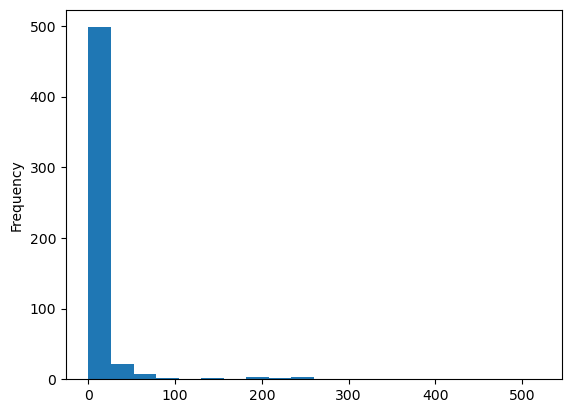

In [80]:
co_df['score'].plot.hist(bins=20)

In [81]:
co_df[co_df['score'] > 200]

,title,link,author,n_comments,score,text
103,Now Brief is pointless,/r/samsung/comments/1j13brx/now_brief_is_point...,Joee0201,48,204,Now brief is the most pointless thing on my ph...
159,Can we all agree that the Samsung S10 was the ...,/r/samsung/comments/1izrd5n/can_we_all_agree_t...,YesterdayValuable641,162,233,"And than, everything stopped.\nSo... everythin..."
294,Samsung Needs to Stop Handicapping Its Own Fla...,/r/samsung/comments/1ix3zvy/samsung_needs_to_s...,soumilr7,93,246,Samsung has been making some questionable deci...
389,Switched Sides. Perspective from a former iOS ...,/r/samsung/comments/1iuwy73/switched_sides_per...,Hooman-42,111,230,I got the S25 Ultra after trading in my iPhone...
396,BF set up my phone and I can't fix his prank,/r/samsung/comments/1iutnvr/bf_set_up_my_phone...,CatsMeowuwu,66,205,He made it so my phone will blast music from S...
415,Secure Folder is not secure and files can be a...,/r/samsung/comments/1iuif80/secure_folder_is_n...,lawyerz88,36,253,"Just FYI, coming from pixel, I expected secure..."
457,Finally!!! From iPhone 15 Pro Max to S25 Ultra...,/r/samsung/comments/1itbij0/finally_from_iphon...,Relevant_Lecture_86,166,520,https://preview.redd.it/l76aszopu4ke1.jpg?widt...
525,S25 Ultra Return Nightmare,/r/samsung/comments/1irw6tu/s25_ultra_return_n...,Complete_Virus4649,130,249,I decided to return my S25 Ultra because I did...


In [82]:
co_df[co_df['score'] > 200]['link'].to_list()

['/r/samsung/comments/1j13brx/now_brief_is_pointless/',
 '/r/samsung/comments/1izrd5n/can_we_all_agree_that_the_samsung_s10_was_the/',
 '/r/samsung/comments/1ix3zvy/samsung_needs_to_stop_handicapping_its_own/',
 '/r/samsung/comments/1iuwy73/switched_sides_perspective_from_a_former_ios_user/',
 '/r/samsung/comments/1iutnvr/bf_set_up_my_phone_and_i_cant_fix_his_prank/',
 '/r/samsung/comments/1iuif80/secure_folder_is_not_secure_and_files_can_be/',
 '/r/samsung/comments/1itbij0/finally_from_iphone_15_pro_max_to_s25_ultra/',
 '/r/samsung/comments/1irw6tu/s25_ultra_return_nightmare/']

<Axes: >

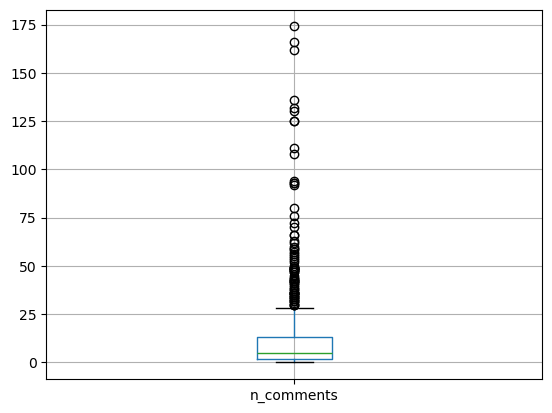

In [83]:
co_df.boxplot('n_comments')

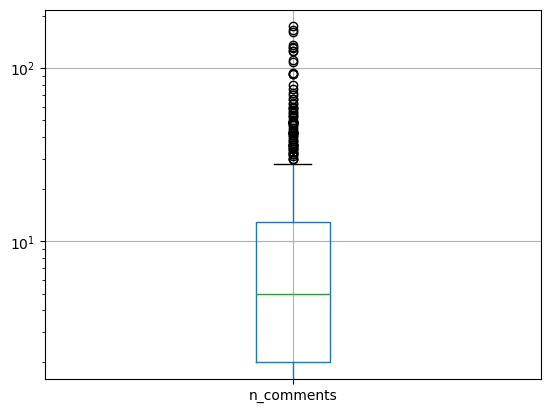

In [84]:
import matplotlib.pyplot as plt
co_df.boxplot('n_comments')
plt.yscale('log')

<Axes: xlabel='score', ylabel='n_comments'>

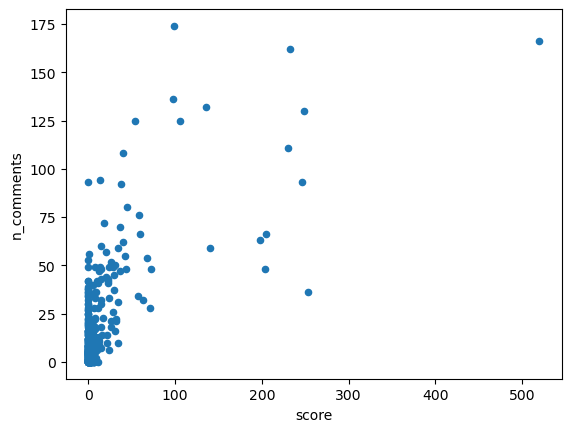

In [85]:
co_df.plot.scatter(x='score', y='n_comments')

<Axes: xlabel='author'>

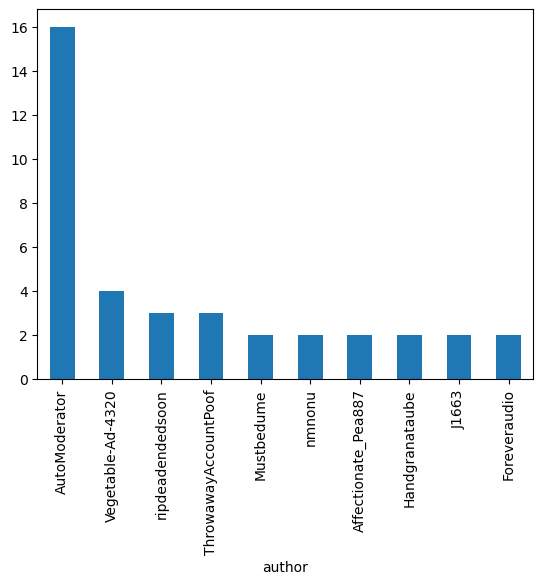

In [86]:
co_df['author'].value_counts()[:10].plot.bar()

In [87]:
co_df[co_df['author'] == 'lawyerz88']

,title,link,author,n_comments,score,text
415,Secure Folder is not secure and files can be a...,/r/samsung/comments/1iuif80/secure_folder_is_n...,lawyerz88,36,253,"Just FYI, coming from pixel, I expected secure..."


In [88]:
import nltk

fd = nltk.FreqDist(' '.join(co_df['title']).split())

fd.most_common(20)

[('the', 106),
 ('to', 105),
 ('Samsung', 102),
 ('on', 70),
 ('a', 68),
 ('for', 64),
 ('S25', 59),
 ('Galaxy', 48),
 ('Ultra', 47),
 ('in', 45),
 ('I', 43),
 ('is', 40),
 ('and', 39),
 ('my', 38),
 ('Is', 36),
 ('from', 35),
 ('with', 33),
 ('S24', 29),
 ('or', 28),
 ('of', 28)]

In [89]:
import nltk

fd = nltk.FreqDist(' '.join(co_df['title']).split())

fd.most_common(20)

[('the', 106),
 ('to', 105),
 ('Samsung', 102),
 ('on', 70),
 ('a', 68),
 ('for', 64),
 ('S25', 59),
 ('Galaxy', 48),
 ('Ultra', 47),
 ('in', 45),
 ('I', 43),
 ('is', 40),
 ('and', 39),
 ('my', 38),
 ('Is', 36),
 ('from', 35),
 ('with', 33),
 ('S24', 29),
 ('or', 28),
 ('of', 28)]

<Axes: xlabel='Samples', ylabel='Counts'>

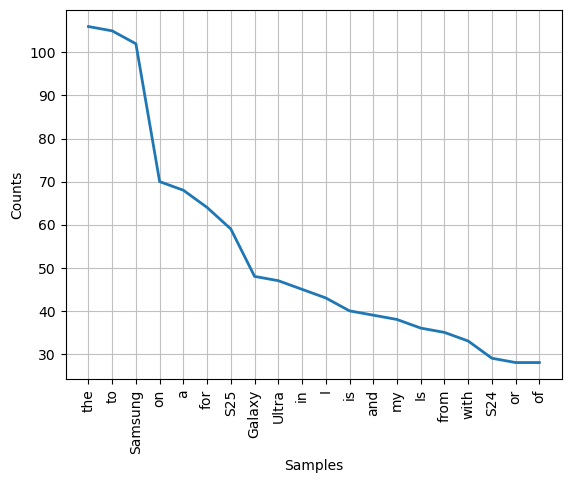

In [90]:
fd.plot(20)

In [91]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [93]:
words = ' '.join(co_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [94]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('samsung', 128),
 ('s25', 74),
 ('galaxy', 67),
 ('ultra', 61),
 ('s24', 33),
 ('phone', 31),
 ('screen', 24),
 ('2025', 20),
 ('vs', 20),
 ('-', 20),
 ('support', 18),
 ('new', 18),
 ('daily', 17),
 ('thread', 16),
 ('|', 16),
 ('watch', 14),
 ('use', 14),
 ('iphone', 13),
 ('one', 13),
 ('charging', 13)]

<Axes: xlabel='Samples', ylabel='Counts'>

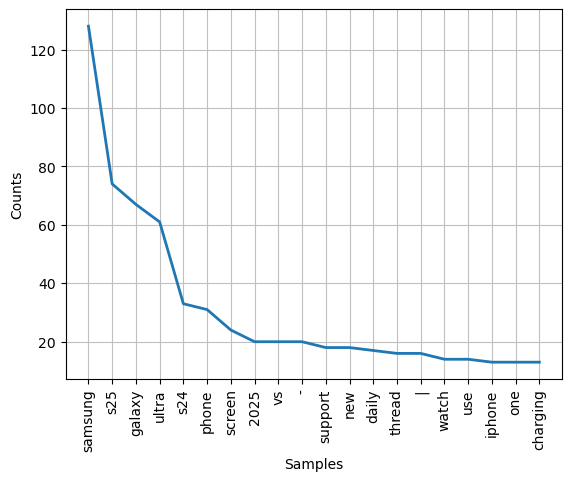

In [95]:
cleaned_fd.plot(20)

#  Summary

# Overview

The task involves collecting data from a subreddit using the Reddit API and performing exploratory data analysis (EDA).

  The collected data is stored in a SQLite3 database.

  Basic EDA includes creating at least two visualizations.

  A short analysis is required at the end to summarize findings.

# Key Tasks

1.Reddit API Setup

  Requires creating a Reddit account and API keys.

  Uses the praw library for data extraction.

  The notebook imports necessary libraries like pandas, matplotlib, wordcloud, and textblob.

2.Data Collection

  The subreddit "Samsung" is used as an example.

  Extracts hot posts from the subreddit, with a limit of 10.

  Prints post titles and scores.

3.Data Processing and Storage

  Saves the extracted posts in a structured format.

  Uses SQLite3 for database storage.

4.Exploratory Data Analysis (EDA)

  Expected to include two plots (not extracted in this summary but likely visualizations of post engagement).

